In [ ]:
import keras  

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from keras.models import Model
from keras.layers import Input, Dense 

from sklearn import datasets 
from sklearn.preprocessing import MinMaxScaler 

In [ ]:
iris = datasets.load_iris() 
X = iris.data 
Y = iris.target 
target_names = iris.target_names 

In [ ]:
scaler = MinMaxScaler() 
scaler.fit(X) 
X_scaled = scaler.transform(X) 

In [ ]:
def plot3clusters(X, title, vtitle): 
  plt.figure() 
  colors = ['red', 'green', 'blue'] 
  lw = 2 
  for color, i, target_name in zip(colors, [0, 1, 2], target_names): 
    plt.scatter(X[Y==i, 0], X[Y==i, 1], color=color, alpha=1., lw=lw, label=target_name) 
    plt.legend(loc='best', shadow=False, scatterpoints=1) 
    plt.title(title) 
    plt.xlabel(vtitle + "1") 
    plt.ylabel(vtitle + "2") 
    plt.show() 

In [ ]:
input_dim = X_scaled.shape[1] 
encoding_dim = 2 
input_img = Input(shape=(input_dim, )) 
encoded = Dense(encoding_dim, activation='sigmoid')(input_img) 
decoded = Dense(input_dim, activation='sigmoid')(encoded) 
autoencoder = Model(input_img, decoded) 
autoencoder.compile(optimizer='adam', loss='mse') 
print(autoencoder.summary())

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_4 (Dense)             (None, 2)                 10        
                                                                 
 dense_5 (Dense)             (None, 4)                 12        
                                                                 
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = autoencoder.fit(X_scaled, X_scaled, epochs=1000, batch_size=16, shuffle=True, validation_split=0.1, verbose=1)

Epoch 1/1000
9/9 [==============================] - 0s 16ms/step - loss: 0.1031 - val_loss: 0.0478
Epoch 2/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.1015 - val_loss: 0.0480
Epoch 3/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.0999 - val_loss: 0.0483
Epoch 4/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.0985 - val_loss: 0.0487
Epoch 5/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.0970 - val_loss: 0.0492
Epoch 6/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.0957 - val_loss: 0.0497
Epoch 7/1000
9/9 [==============================] - 0s 7ms/step - loss: 0.0943 - val_loss: 0.0501
Epoch 8/1000
9/9 [==============================] - 0s 7ms/step - loss: 0.0930 - val_loss: 0.0506
Epoch 9/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.0919 - val_loss: 0.0511
Epoch 10/1000
9/9 [==============================] - 0s 6ms/step - loss: 0.0908 - val_loss: 0.0516
Epoch 11/1000
9/9 

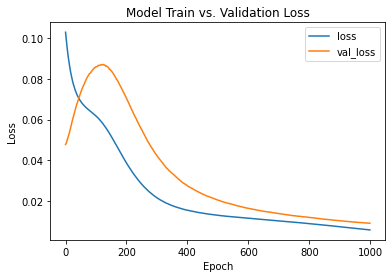

In [ ]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model Train vs. Validation Loss') 
plt.xlabel("Epoch") 
plt.ylabel("Loss") 
plt.legend(['loss', 'val_loss'], loc='upper right') 
plt.show()

5/5 [==============================] - 0s 2ms/step


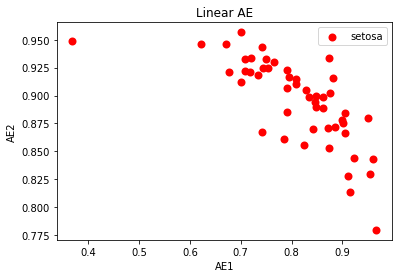

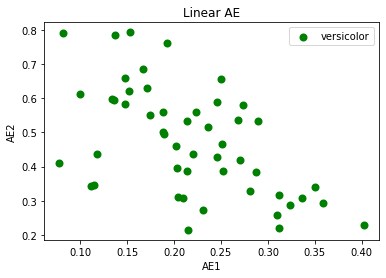

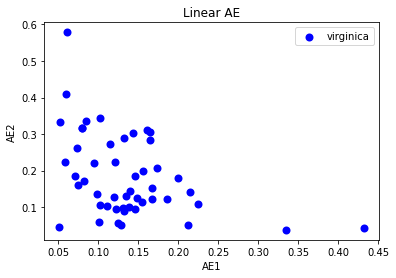

In [ ]:
# Use our encoded layer to encode the training input 
encoder = Model(input_img, encoded) 
encoded_input = Input(shape=(encoding_dim,)) 
decoder_layer = autoencoder.layers[-1] 
decoder = Model(encoded_input, decoder_layer(encoded_input)) 
encoded_data = encoder.predict(X_scaled) 
plot3clusters(encoded_data[:,:2], 'Linear AE', 'AE') 